<a href="https://colab.research.google.com/github/Pravallika1234uppala/ML/blob/main/ML%20Models/Supervised%20Learning/Regression%20Models/LinearRegression/Multiple%20Linear%20Regression/Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#index_price - relation price changes b/w a period of time.
#calculated using interest_rate and unemployment_rate.
#we use multi linear regression bcz we use two independent features that are used in finding index_price.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("economic_index.csv")

In [6]:
df = df.drop(labels='Unnamed: 0', axis=1)

In [7]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [8]:
#to drop unnecessary columns:
#inplace-true if sure it drops and reflects in original data frame.
df.drop(columns=['year','month'], axis=1)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [9]:
df

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


In [10]:
df.drop(columns=['year','month'], axis=1, inplace=True)

In [11]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [12]:
df.isnull() #to check null values

,interest_rate,unemployment_rate,index_price
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


<Axes: >

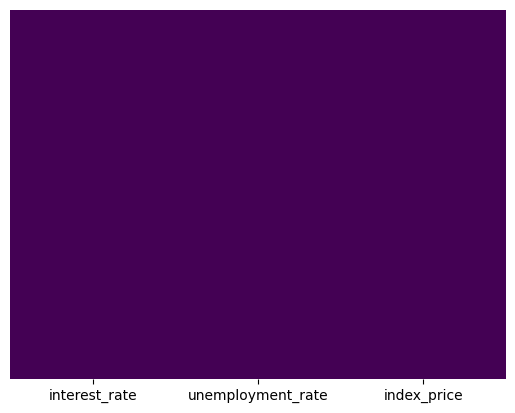

In [13]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [14]:
#to check sum of null values:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


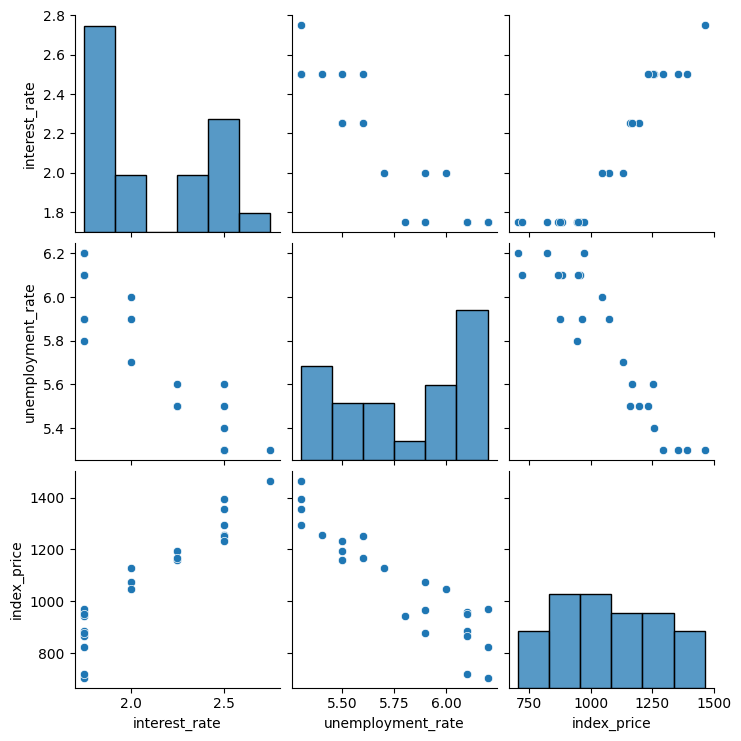

In [15]:
#no null values-so no datacleaning and removing missing values.
#now, Visualization:
sns.pairplot(df)

In [16]:
#index_price and interest_race has inverse relationship:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: >

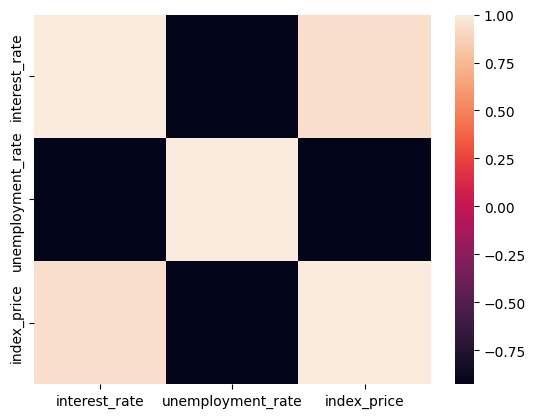

In [17]:
#negative correlation-inverse linear relation here.
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Interest Rate Vs UnEmployment Rate')

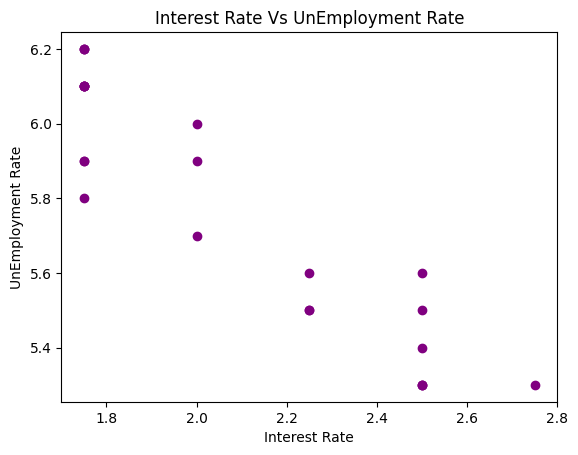

In [18]:
#Visualization of datapoints:
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='purple')
plt.xlabel("Interest Rate")
plt.ylabel("UnEmployment Rate")
plt.title("Interest Rate Vs UnEmployment Rate")

In [19]:
#independent and dependent features:
X = df.iloc[:,:-1]

In [20]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [21]:
y = df.iloc[:,-1]

In [22]:
y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
X_train

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1
3,2.50,5.3
4,2.50,5.4
22,1.75,6.2


In [25]:
X_test

,interest_rate,unemployment_rate
8,2.25,5.5
16,1.75,6.2
0,2.75,5.3
18,1.75,6.1
11,2.00,5.9
9,2.25,5.6


In [26]:
y_train

,index_price
13,965
1,1394
21,822
5,1254
2,1357
12,1047
15,958
3,1293
4,1256
22,704


In [27]:
y_test

,index_price
8,1159
16,971
0,1464
18,884
11,1075
9,1167


<Axes: xlabel='interest_rate', ylabel='index_price'>

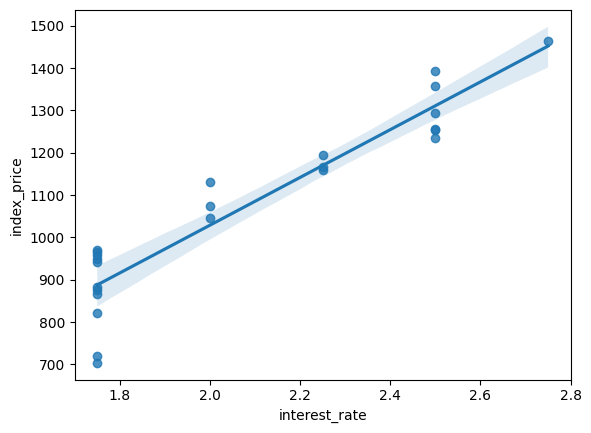

In [28]:
#this plots data in linear model regression fit
sns.regplot(data=df,x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

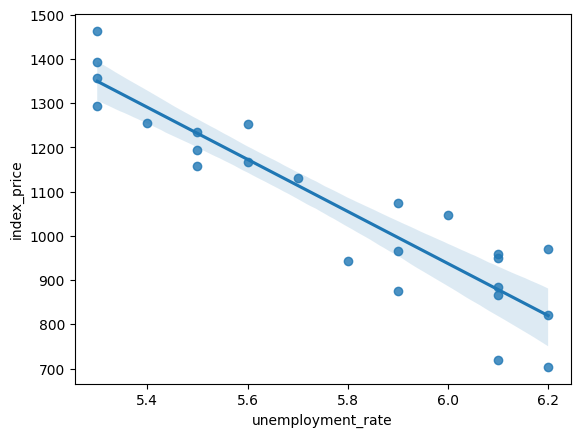

In [29]:
sns.regplot(data=df,x=df['unemployment_rate'],y=df['index_price'])

In [30]:
#above is inverse-as unemployment_rtate increases index_price decreases.

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

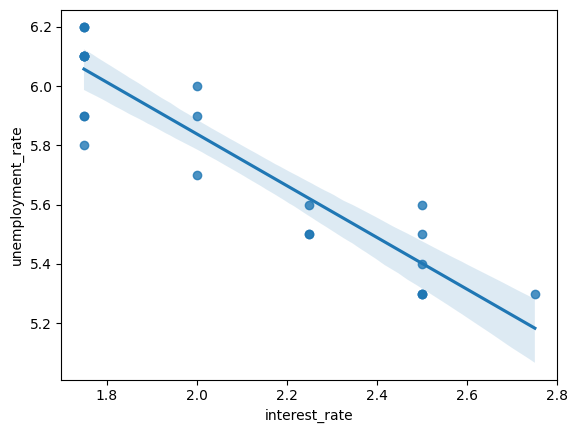

In [31]:
sns.regplot(data=df,x=df['interest_rate'],y=df['unemployment_rate'])

In [32]:
#in above graph it is kind of constant.
#As interest_rate increases, no change in unemployment.

In [33]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler() #intializing scalar


In [35]:
scaler

StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
scaler

StandardScaler()

In [38]:
#don't have to do scaling on y data.
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [39]:
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [40]:
y_train.shape

(18,)

In [41]:
#Model:
from sklearn.linear_model import LinearRegression
regressionmodel = LinearRegression() #intializing model

In [42]:
regressionmodel

LinearRegression()

In [43]:
regressionmodel.fit(X_train,y_train)

LinearRegression()

In [44]:
#Cross val score-evaluating a score by cross-validation:

In [45]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regressionmodel,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
#there are many scoring parameters search in scikit-learn
#cv=3 means testsize/validation data = no.of records/cv
#every cv we get a mse(from scoring parameter)-here using neg mean sqaured error(mse in -ve)
#the more error comes to 0(more better model)
#cv no. of accuracy

In [46]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [47]:
#avg of score:
np.mean(validation_score)

-5914.828180162386

In [48]:
#prediction for linear model:
y_pred = regressionmodel.predict(X_test)

In [49]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [50]:
#Cost functions
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 5793.762887712569
Mean Absolute Error: 59.935781523235484
Root Mean Squared Error: 76.11677139574805


In [51]:
#performance metrics:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)
adjusted_score = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_score

0.8278978091457145


0.7131630152428576

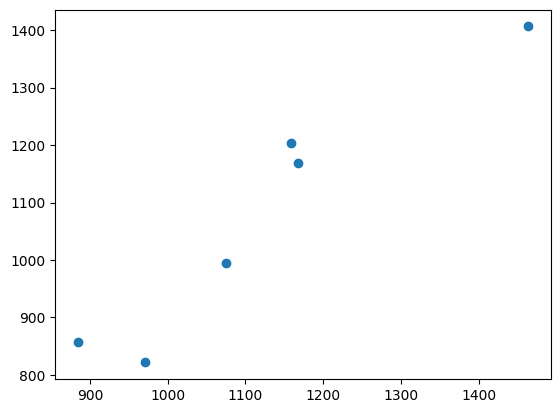

In [52]:
#assumptions: if model is performing well or not.
#1. scatterplot
plt.scatter(y_test, y_pred) #linear relationship -model has performed well.



In [53]:
residuals = y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


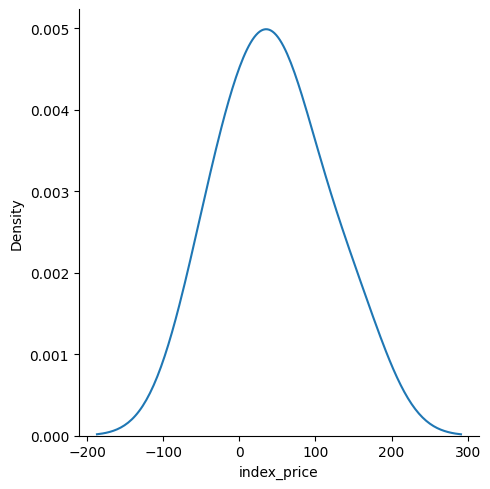

In [54]:
sns.displot(residuals, kind='kde') #if normal distribution kind of curve - model is good.


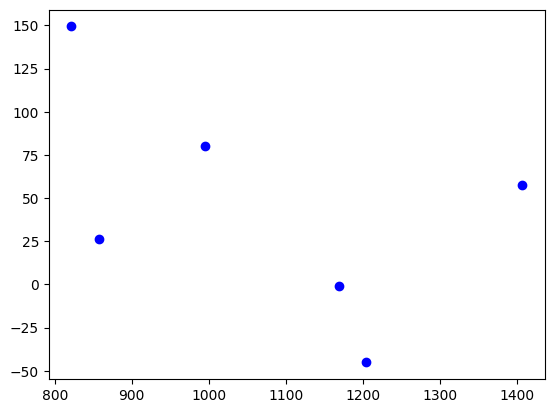

In [55]:
#predictions and error or residual scatter plot
plt.scatter(y_pred, residuals, color='blue')
#data is not uniformly distributed - it is following pattern
#if following pattern-there is a problem.


In [56]:
#linear reg with OLS
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
#in ols we need to give endog-output and exog-input
prediction = model.predict(X_test)
print(prediction)


[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [57]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 19 Feb 2025   Prob (F-statistic):                       0.754
Time:                        21:46:08   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [58]:
#coeffiecine
print(regressionmodel.coef_)

[  88.27275507 -116.25716066]


In [59]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [60]:
X_train[:, 0]

array([-0.90115511,  1.31077107, -0.90115511,  1.31077107,  1.31077107,
       -0.16384638, -0.90115511,  1.31077107,  1.31077107, -0.90115511,
       -0.90115511, -0.90115511, -0.90115511,  0.57346234, -0.16384638,
       -0.90115511, -0.90115511,  1.31077107])